<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/133_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 133: Movie Recommender System

---

### Teacher-Student Activities

Have you ever wondered how YouTube recommends videos or how Facebook recommends you new friends?
You may have noticed similar recommendations with Netflix movie suggestions, or Amazon's product recommendation. All of these recommendations are made possible by the implementation of **Recommender Systems**.

**What are Recommender Systems?**

- Recommender systems use a class of techniques and algorithms to recommend relevant items to users.
- For example, if a user listens to pop music every day, his YouTube recommendation feed will get full of pop music and music of related genres.

In the upcoming lessons, we will explore and design some interesting recommendation systems starting with a basic **Movie Recommender**.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/44479983-c5da-486b-98c8-992aa603de1f.jpg" height = 300 width = 500/>

`Designed by Freepik`
</center>

Typically, a movie recommender can be one of the following types:

**1. Basic Recommender:** Recommends the most popular or highest rated movies (just like the *YouTube trending page*).

**2. Content Based Filtering:** Recommends similar movies based on metrics like movie plot, genre, actors, language etc.

**3. Collaborative Filtering:** Based on the watch history/pattern of a user. For example, Netflix uses a combination of both Content Based and Collaborative Filtering.

In the upcoming classes, we will build few basic recommendation systems. Let us first explore the dataset used for building this recommender.


---

#### Movie Recommender Problem Statement

**The Dataset**

The movies dataset contains metadata for 45,000 movies released on or before July 2017 and listed in the [MovieLens](https://movielens.org) database. Features include genre, title, budget, revenue, release dates, languages, production countries and companies, countries, [TMDB](https://www.themoviedb.org) vote counts and vote averages, and other details. Below are the features information:

**Attribute Information:**

    adult: Indicates if the movie is X-Rated or Adult.
    belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
    budget: The budget of the movie in dollars.
    genres: A stringified list of dictionaries that list out all the genres associated with the movie.
    homepage: The Official Homepage of the move.
    id: The ID of the movie.
    imdb_id: The IMDB ID of the movie.
    original_language: The language in which the movie was originally shot in.
    original_title: The original title of the movie.
    overview: A brief blurb of the movie.
    popularity: The Popularity Score assigned by TMDB.
    poster_path: The URL of the poster image.
    production_companies: A stringified list of production companies involved with the making of the movie.
    production_countries: A stringified list of countries where the movie was shot/produced in.
    release_date: Theatrical Release Date of the movie.
    revenue: The total revenue of the movie in dollars.
    runtime: The runtime of the movie in minutes.
    spoken_languages: A stringified list of spoken languages in the film.
    status: The status of the movie (Released, To Be Released, Announced, etc.)
    tagline: The tagline of the movie.
    title: The Official Title of the movie.
    video: Indicates if there is a video present of the movie with TMDB.
    vote_average: The average rating of the movie.
    vote_count: The number of votes by users, as counted by TMDB.

<br>

**Problem Statement**

Imagine you are working as a Data Scientist for Netflix or a similar movie streaming platform. Your company wants to catch on to the new subscribers by making them hooked to their multimedia content. As a Data Scientist you are expected to construct an algorithm to recommend movie to newly registered users. For this:

- You need to find out the most important features in the dataset to build a recommender system to suggest top movies for new subscribers.

- As new subscribers do not have a watch history, your task is to identify and suggest top rated movies which a new user is likely to appreciate and as a result stay connected to the streaming platform.

**Acknowledgement:** This dataset is an ensemble created by Rounak Banik using the data collected from TMDB and GroupLens.

**Dataset Source:** https://www.kaggle.com/rounakbanik/the-movies-dataset

---

#### Activity 1: Import Modules and Reading Data

Let's import the necessary Python modules.

Also, read the data from a csv file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).

**Dataset Link:** https://drive.google.com/uc?id=1rPR-P45M2UWsbXc8vpyCzWcQAYUfgVJX

In [ ]:
# S1.1: Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Read the dataset and print first five records.
mov_rec=pd.read_csv('https://drive.google.com/uc?id=1rPR-P45M2UWsbXc8vpyCzWcQAYUfgVJX')
mov_rec.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0



Now, let's find out the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.

In [ ]:
# S1.2: Get the total number of rows and columns, data types of columns and missing values in the dataset
mov_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

The dataset consists of 45466 rows and 24 columns. A lot of features exhibit missing (or null) values in the dataset.

Our aim is to build three simple recommender systems which recommends:
1. Top 20 movies having highest popularity.
2. Top 20 movies having highest average weighted rating.
3. Top 20 movies of a genre having highest rating.

As our dataset contains a lot of features that are not useful in building the above recommenders, let us create a subset of this dataset that consists of important features like:
`genres`, `id`, `popularity`, `title`, `vote_average`, `vote_counts`




In [ ]:
# S1.3: Create a DataFrame with only required features.
subset=mov_rec[['genres', 'id', 'popularity', 'title', 'vote_average', 'vote_count']]
subset.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,11.7129,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,3.859495,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,8.387519,Father of the Bride Part II,5.7,173.0


Let us now proceed with data cleaning and data preparation for subset DataFrame.


In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45466 non-null  object 
 1   id            45466 non-null  object 
 2   popularity    45461 non-null  object 
 3   title         45460 non-null  object 
 4   vote_average  45460 non-null  float64
 5   vote_count    45460 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.1+ MB




---



#### Activity 2 : Data Cleaning

While making recommendation it is important to check for any duplicate entry for a movie in the database. Since 2 movies might have same name but the `id` would be different for them, check for duplicate entries on `id` field. For this use `DataFrame.duplicated()` function from the Pandas.

`DataFrame.duplicated(subset, keep='first')`

Where,

- `subset` is `None` or optional: It is the column label (or sequence of labels), on which the system will check the duplicate entries. If `none` (default), it will check for duplicate entries for all the columns.

- `keep{'first', 'last', False}`: This controls how to consider duplicate value. It has only three distinct values and default is `'first'`.
    - `'first'` : This considers first value as unique and rest of the same values as duplicate.

    - `'last'` : This considers last value as unique and rest of the same values as duplicate.

    - `False` : This considers all of the same values as duplicates.

- The function returns a series with duplicate rows from the DataFrame.


To check the duplicate entries of `'id'` field, follow the steps given below:

1. Pass following two inputs to `duplicated()` function of `mov_subset_df` DataFrame:
 - `'id'`: To check the duplicate values based on `'id'` field.
 - `keep = False`: To return all duplicate rows.

2. Sort the resulting series by `'id'` using `sort_values()` function.

In [ ]:
# S2.1: Identify and display the duplicate entries in the dataset
subset[subset.duplicated('id', keep=False)].sort_values(by='id')


,genres,id,popularity,title,vote_average,vote_count
676,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,0.122178,The Promise,5.0,1.0
1465,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,0.122178,The Promise,5.0,1.0
44821,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,6.480376,Pokémon: Spell of the Unknown,6.0,144.0
4114,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,10.264597,Pokémon: Spell of the Unknown,6.0,143.0
5710,"[{'id': 18, 'name': 'Drama'}]",109962,12.180836,Rich and Famous,4.9,7.0
20899,"[{'id': 18, 'name': 'Drama'}]",109962,10.396878,Rich and Famous,4.9,7.0
23534,"[{'id': 18, 'name': 'Drama'}]",110428,0.110065,Camille Claudel 1915,7.0,20.0
4356,"[{'id': 18, 'name': 'Drama'}]",110428,0.134014,Camille Claudel 1915,7.0,20.0
24844,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,6.880365,Deal,5.2,22.0
14012,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,6.880365,Deal,5.2,22.0


Here we observe that the DataFrame exhibits duplicate entries for a lot of movies. Let's drop these duplicate movie details from the dataset and keep only one set of these duplicate details.

To remove the duplicate entries, use `DataFrame.drop_duplicates()` function:

**Syntax to remove duplicates:** `DataFrame.drop_duplicates(subset = None)`

Here, `subset` is `None` or optional: It is the column label (or sequence of labels), for which the duplicate entries would be removed. If `None` (default), it will remove duplicate entries for all the columns.

To remove the duplicate entries based on `'id'`:

1. Call the `drop_duplicates()` function of the subset DataFrame and pass `subset = ['id']` as input.

2. Verify the removal of duplicate entries based on `'id'` field using `duplicated()` function.

In [ ]:
# T2.2: Remove and verify the duplicate movie entries

# Drop the duplicate rows on id column
subset=subset.drop_duplicates(subset="id")

# Verify removal of duplicated entries on id column
subset[subset.duplicated("id")]

,genres,id,popularity,title,vote_average,vote_count


Thus, the duplicate values have been removed from the DataFrame. Let us check the total number of rows, columns and data types of columns.

In [ ]:
# S2.2: Get the total number of rows and columns and data types of columns.
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45436 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45436 non-null  object 
 1   id            45436 non-null  object 
 2   popularity    45431 non-null  object 
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


You may observe that some of the features contain null values in the dataset. Let us see how many null values are present in each of the features.

In [ ]:
# S2.3: Find the sum of missing values in the dataset.
subset.isnull().sum()

genres          0
id              0
popularity      5
title           6
vote_average    6
vote_count      6
dtype: int64

As there are not many null values, let us simply drop these null values from the dataset.

In [ ]:
# S2.4: Drop null values from the subset DataFrame
subset.dropna(inplace=True)
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45430 non-null  object 
 1   id            45430 non-null  object 
 2   popularity    45430 non-null  object 
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


Now our dataset does not contain any null values. However, the data type of `id` and `popularity` column must be `int` and `float` respectively. Let us convert the data type of these columns using `astype()` function.



In [ ]:
# S2.5: Perform data type conversion.

# Convert the type of 'id' column to 'int' type.
subset['id']=subset['id'].astype('int')
subset['popularity']=subset['popularity'].astype('float')
# Convert the type of 'popularity' column to 'float' type.
subset.info()

# Verify the conversion.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45430 non-null  object 
 1   id            45430 non-null  int64  
 2   popularity    45430 non-null  float64
 3   title         45430 non-null  object 
 4   vote_average  45430 non-null  float64
 5   vote_count    45430 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.4+ MB


Hence, the data type of `id` and `popularity` column is now changed. Let us once again print the first 5 rows of the subset DataFrame.

In [ ]:
# S2.6: Print first 5 rows of DataFrame.
subset.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,11.712900,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,3.859495,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,8.387519,Father of the Bride Part II,5.7,173.0


Here, you can see that the `genres` feature is a list of dictionaries. Print the first  row of the `genres` column to have a closer look at its value.

In [ ]:
# S2.7: Print the first row of 'genres' column.
subset['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

To make movie recommendation and to identify top movies in each genre, we need to convert the `genres` field to a list which contains only the names of genres the movie fall into.

For example, the first row of this dataset would look like this:

`[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]`

$$\boldsymbol{\big\Downarrow}$$

<center>

`[Animation, Comedy, Family]` </center>


Although we can do this by accessing the genre `name` from the respective list of dictionaries and appending them to a list. However, we will use two new methods to achieve this: **Lambda function** and **literal_eval() Function**.

Let us now understand them in more detail.



---

#### Activity 3: Understanding Lambda Function

**Lambda Function:**

- Python lambda functions are anonymous function means that the function is without a name.
- These functions are defined without `def` keyword.

- **Syntax of Lambda Function:** `lambda arguments: expression`

  Here, there can be any number of inputs or arguments but only one expression.

Let's understand lambda function with the help of an example:

First, create a `mul()` function using `def` keyword which returns product of 3 numbers.

In [ ]:
def add(a,b):
  return(a+b)
add(45,7)

52

In [ ]:
addto=lambda a,b:a+b
addto(45,7)

52

In [ ]:
# S3.1: Using 'def' function to print product of 3 numbers
def multiply(x,y,z):
  return(x*y*z)
multiply(1,4,5)

20

Here, we obtained product of three numbers. Now the same task can be done using lambda function using the following syntax:

```python
lambda input_1, input_2, input_3: expression
```

This will return the evaluated expression. Store it in some variable and call the lambda function by using this variable and passing inputs.



In [ ]:
# T3.1: Using lambda to print product of 3 numbers
multi= lambda x,y,z:x*y*z
multi(1,4,5)

20

Hence, the lambda function also returned the product of the three input numbers just like the regular function.

Observe the difference between the syntax of regular function and lambda function:
 - Using `def` keyword, you need to give a name to the function. Also to return the result, `return` statement is needed.
 - Using `lambda`,  there is no need to give a name to the function. Also, the `return` statement is not needed as the lambda function contains an expression that is *always* returned.

**Note:** The lambda function is not suitable for  operations that would span more than one line as in a normal `def` function.


**Lambda function with pandas DataFrame:**

Lambda functions are also very useful when handling pandas DataFrame especially when we want to process information of a particular feature/column.

Let's explore it with the help of a dummy DataFrame.

In [ ]:
# Dummy DataFrame
dummy_df = pd.DataFrame({
    'Name': ['John','Samantha','Anthony','Emma'],
    'Relation': ['Father', 'Mother', 'Son', 'Daughter'],
    'Birthyear': [1976, 1984, 2013, 2016],
})

dummy_df

,Name,Relation,Birthyear
0,John,Father,1976
1,Samantha,Mother,1984
2,Anthony,Son,2013
3,Emma,Daughter,2016


Here we  are given with the basic information of a family and their birth year.

Suppose we want to calculate the age of each person and add a column in the DataFrame which displays the `age`. The age can be calculated by subtracting the values of `Birthyear` column from the current year (consider current year to be 2022).

Instead of creating a loop or a function for it, we can use `apply()` function for the `Birthyear` column and pass a lambda function which will calculate the age of a person. To perform this task, follow the steps given below:

1. Call the `apply()` function on `dummy_df['Birthyear']` column and pass the following lambda function as input to `apply()` function:
  ```python
  lambda x: 2022 - x
  ```

2. Store the returned values in a separate column `'age'` in `dummy_df` DataFrame. Display the updated DataFrame.


In [ ]:
# T3.2: Calculate age using lambda function and store it as a separate column in dummy_df.
dummy_df["age"]=dummy_df["Birthyear"].apply(lambda x:2024-x)
dummy_df

,Name,Relation,Birthyear,age
0,John,Father,1976,48
1,Samantha,Mother,1984,40
2,Anthony,Son,2013,11
3,Emma,Daughter,2016,8


Here, the lambda function is applied to every row of `dummy_df['Birthyear']` and `x` holds the current row value of the DataFrame.

Next, let's understand `literal_eval()` function.



---

#### Activity 4: Parsing List-Type Strings

Let us store the first row of `genres` column and print its value and data type.

In [ ]:
# S4.1: Print first row of 'genres' column and its data type.
first_row=subset['genres'][0]
print(type(first_row))
print(first_row)

<class 'str'>
[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


Here, you can observe that although the `genres` column is a **list** of dictionaries, its data type is not `list`, rather it is `str`. This is because of the single quotes (`''`) around the list. Such list are called as **list-type strings**.

We need to *unstring* such list-type strings to convert its data type back to `list` so that we can extract the value of `'name'` key using `for` loop.

To do so, we can use `literal_eval()` function of Python's `ast` module (Abstract Syntax Tree) to unstring a list.

Let us unstring the first row of `'genres'` column using `literal_eval()`. Before that, import `literal_eval()` function from `ast` module.

In [ ]:
# T4.1: Parse first row of genres column and print its data type.
from ast import literal_eval
first_row_unstring=literal_eval(first_row)
print(type(first_row_unstring))
print(first_row_unstring)

<class 'list'>
[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


Here, the same string when parsed through `literal_eval()` function is now identified as list.

This function can also be used to unstring a dictionary. For example, consider the following dictionary:

```python
dict1 = '{"id":"123", "name":"Refrigerator"}'
```

Let's print the original data type of this dictionary, parse it using `literal_eval()` function and again print its data type.

In [ ]:
# S4.2: Parse 'dict1' using 'literal_eval()' function.
dict1 = '{"id":"123", "name":"Refrigerator"}'
dict1=literal_eval(dict1)
print(type(dict1))
print(dict1)

<class 'dict'>
{'id': '123', 'name': 'Refrigerator'}


Now, the string is identified as a dictionary since it follows the syntactic declaration of a dictionary, with various `key:value` pairs. This depicts that the `literal_eval()` identifies the correct format for the string and parsing the string produces relevant data type.

We are now ready to extract only the genre names from the `genres` field, for example:

`[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]`

$$\boldsymbol{\big\Downarrow}$$

<center>

`[Animation, Comedy, Family]` </center>

To obtain such a list of genres for each row of the subset DataFrame, follow the steps given below:

1. Use `apply()` function for `mov_subset_df['genres']` column and pass a lambda function as input to the `apply()` function. This lambda function must perform the following tasks in a single line using list comprehension:
 - Parse or unstring list of dictionaries obtained at each row using `literal_eval()` function.
 - Iterate through every dictionary of the parsed list using `for` loop.
 - Extract the value of `'name'` key from every dictionary and append it to the new list created by list comprehension. This new list will be returned by the lambda function.

2. Store the list returned by lambda function for each row as a new row for `'genres'` column.

3. Print first 5 rows of the subset DataFrame to verify whether the `'genres'` column contains the modified values or not.

In [ ]:
# T4.2: Use lambda function and 'literal_eval()' to obtain a list of genres.
subset["genres"]=subset["genres"].apply(lambda x:[i["name"] for i in literal_eval(x)])
subset.head()

,genres,id,popularity,title,vote_average,vote_count
0,"[Animation, Comedy, Family]",862,21.946943,Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",8844,17.015539,Jumanji,6.9,2413.0
2,"[Romance, Comedy]",15602,11.712900,Grumpier Old Men,6.5,92.0
3,"[Comedy, Drama, Romance]",31357,3.859495,Waiting to Exhale,6.1,34.0
4,[Comedy],11862,8.387519,Father of the Bride Part II,5.7,173.0


The `genres` column is now modified and comprises of list of the genres the respective movie falls into.

Our dataset is now ready for building some recommendation systems.

Before building some recommenders, let us obtain one more subset of the dataset where the `genres` field would contain only a  single value rather than a list.






---



#### Activity 5: Exploding DataFrame

Let us first print 5 rows of `'genres'` column of the subset DataFrame.


In [ ]:
# S5.1: Print first 5 rows of 'genres' column.


We can notice that the elements in the `'genres'` column of the subset DataFrame consists of lists. However, we may need to expand the list into multiple columns to keep only a single genre rather than a list of genres in each row.

For example:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/1e1742f6-98c1-4dc6-851a-988662d1706f.PNG"/>

The genres list can be expanded like this:


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f5d115a0-94d2-44cc-a1c5-473efaac92b6.PNG"/></center>

To unpack or expand the list of genres, use `explode()` function of pandas DataFrame. This function transforms each element of a list-like to a row. It returns DataFrame exploded lists to rows of the subset columns.

**Syntax of `explode()` function:** `DataFrame.explode(column, ignore_index = False)`

Here,
 - `column`:  Column to be exploded.
 - `ignore_index`: bool, default `False`. If `True`, the resulting index will be labelled `0, 1,..., n - 1`.

Let us now explode the `genres` column by keeping `ignore_index = False`.

In [ ]:
# T5.1: Explode 'genres' column and replicate index
subset['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

Here, you can see that the index is duplicated for the exploded rows. However, if we want to assign a new index number to every row of the DataFrame, just use `ignore_index = True` parameter. Let us see how it works.

In [ ]:
# S5.2: Explode 'genres' column and give new index to every row.
gen_sub=subset.explode('genres', ignore_index = False)
gen_sub.head()

,genres,id,popularity,title,vote_average,vote_count
0,Animation,862,21.946943,Toy Story,7.7,5415.0
0,Comedy,862,21.946943,Toy Story,7.7,5415.0
0,Family,862,21.946943,Toy Story,7.7,5415.0
1,Adventure,8844,17.015539,Jumanji,6.9,2413.0
1,Fantasy,8844,17.015539,Jumanji,6.9,2413.0


We now obtained a subset DataFrame where  `genres` field now consists of a single element.  We can use this subset DataFrame for performing various data visualisation that we will perform in the next class.  

Let us now build a simple movie recommender that recommends movies on the basis of the popularity score.


In [ ]:
gen_sub=subset.explode('genres', ignore_index = True)
gen_sub.head()

,genres,id,popularity,title,vote_average,vote_count
0,Animation,862,21.946943,Toy Story,7.7,5415.0
1,Comedy,862,21.946943,Toy Story,7.7,5415.0
2,Family,862,21.946943,Toy Story,7.7,5415.0
3,Adventure,8844,17.015539,Jumanji,6.9,2413.0
4,Fantasy,8844,17.015539,Jumanji,6.9,2413.0


---

#### Activity 6: Recommendation Based on Popularity

Let us now recommend top 20 popular movies to the new subscriber by simply sorting the subset DataFrame by `'popularity'` column.

Follow the steps given below:
1. Use `sort_values()` function with subset `mov_subset_df` DataFrame and pass following inputs to this function:
 - `by = 'popularity'`: To sort the DataFrame according to the `popularity` column.
 - `ascending = False`: To sort in descending order.

2. Use `head(20)` function to obtain only first 20 rows and store the sorted DataFrame in a new DataFrame.

In [ ]:
# S6.1: Top 20 movies as per popularity of the movie
top20=subset.sort_values(by='popularity',ascending= False).head(20)
top20.head()

,genres,id,popularity,title,vote_average,vote_count
30700,"[Family, Animation, Adventure, Comedy]",211672,547.488298,Minions,6.4,4729.0
33356,"[Action, Adventure, Fantasy]",297762,294.337037,Wonder Woman,7.2,5025.0
42222,"[Family, Fantasy, Romance]",321612,287.253654,Beauty and the Beast,6.8,5530.0
43644,"[Action, Crime]",339403,228.032744,Baby Driver,7.2,2083.0
24455,"[Adventure, Family, Animation, Action, Comedy]",177572,213.849907,Big Hero 6,7.8,6289.0


Thus the most popular movie across all genres is **Minions**. This list of movies is like YouTube trending page and can be recommended to a new subscriber.

Let us also visualise this DataFrame by creating a barplot using `seaborn` module. Plot `'popularity'` on $x$-axis and `'title'` on $x$-axis.


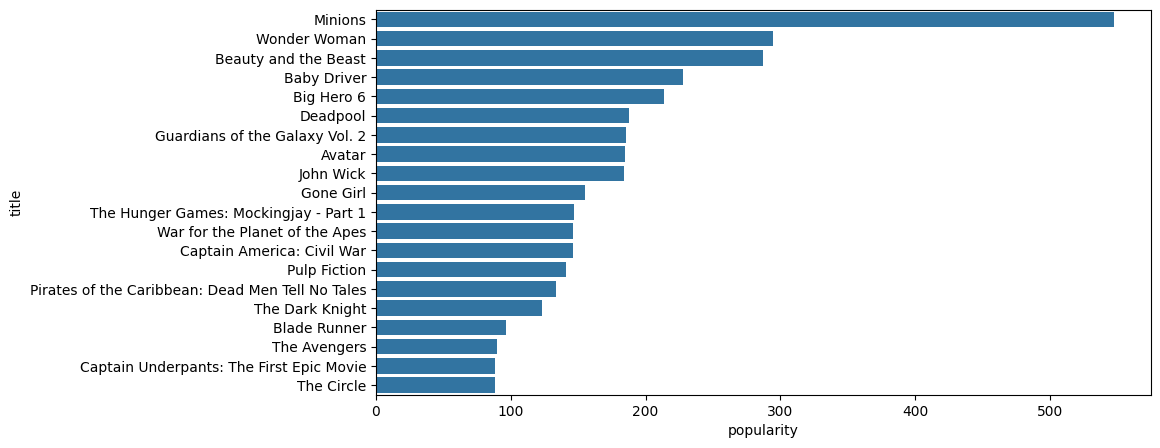

In [ ]:
# S6.2: Plot top 20 popular movies
plt.figure(figsize=(10,5))
sns.barplot(x='popularity',y='title',data=top20)
plt.show()

Hence, a new subscriber can be recommended with these popular movies. This was a recommender system based on popularity.

We will stop here. In next class, we will build some more recommendation systems using the weighted average rating and according to genres selected by the user.

---